# Examine Permafrost Larch TCC estimates extracted from TerraPulse boreal tcc with reference Eurasia field plot data

#### Reference Larix canopy cover only

Paul Montesano | NASA GSFC  
Elizabeth Webb

In [1]:
library(sf)
library(fs)
library(tidyverse)

Linking to GEOS 3.11.2, GDAL 3.7.0, PROJ 9.2.0; sf_use_s2() is TRUE

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
options(repr.plot.width = 9, repr.plot.height = 5, repr.plot.res = 300)

### Reference TCC from visual interpretation of Qickbird imagery from the 2000s
Montesano et al 2009 https://doi.org/10.1016/j.rse.2009.05.021


In [67]:
#quickbird_tcc = st_read('/home/pmontesa/pmontesa/userfs02/arc/QB_GLCF_VCF.shp')
#st_write(quickbird_tcc, '/home/pmontesa/pmontesa/userfs02/data/reference/QB_GLCF_VCF.gpkg')
quickbird_tcc = st_read('/home/pmontesa/pmontesa/userfs02/data/reference/QB_GLCF_VCF.gpkg')

Reading layer `QB_GLCF_VCF' from data source 
  `/panfs/ccds02/nobackup/people/pmontesa/userfs02/data/reference/QB_GLCF_VCF.gpkg' 
  using driver `GPKG'
Simple feature collection with 425 features and 16 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -165.265 ymin: 50.25417 xmax: 164.9753 ymax: 72.41667
Geodetic CRS:  WGS 84


In [68]:
head(quickbird_tcc)

,OBJECTID,NAME,VCF2000c3,VCF2000c4,VCF2001c4,VCF2002c4,VCF2003c4,VCF2004c4,VCF2005c5,QB_pct_tc,POINT_X,POINT_Y,Shape_Leng,Shape_Area,FID_1,VCF2000,geom
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<POLYGON [°]>
1,1,S10 21-80,14,20,18,19,29,19,21,50,31.16745,69.65625,1958.068,216236.9,0,25.92080,POLYGON ((31.17038 69.65417...
2,2,S9 0-20,12,22,21,21,21,22,19,22,29.86134,69.64792,1948.175,216236.6,1,6.03333,"POLYGON ((29.8644 69.64583,..."
3,3,S11 21-80,20,30,23,20,27,28,30,67,31.34698,69.48542,1958.865,216231.2,2,19.85420,POLYGON ((31.34988 69.48333...
4,4,S8 81-100,0,33,33,39,39,38,36,93,29.87875,69.48125,1947.762,216231.1,3,42.64170,POLYGON ((29.88179 69.47917...
5,5,S12 81-100,28,28,28,21,21,32,29,91,31.05913,69.36875,1956.244,216227.3,4,21.07500,POLYGON ((31.06204 69.36667...
6,6,S47 21-80,14,23,21,20,27,21,20,31,32.17092,69.28958,1964.636,216224.7,5,22.93330,"POLYGON ((32.17372 69.2875,..."


In [3]:
#kolyma_agb = st_read('/projects/my-private-bucket/KolymaRegion_all_s3tp_agb_age.gpkg')

In [4]:
#kolyma_tcc = st_read('/projects/my-private-bucket/KolymaRegion_all_s3tp_tcc1984-2020.gpkg')
kolyma_tcc = st_read('/home/pmontesa/pmontesa/userfs02/data/reference/extracted/KolymaRegion_all_tcc1984-2020.gpkg')
names(kolyma_tcc)[which(names(kolyma_tcc) == 'project')] <- 'group_name'

Reading layer `KolymaRegion_all_tcc1984-2020' from data source 
  `/panfs/ccds02/nobackup/people/pmontesa/userfs02/data/reference/extracted/KolymaRegion_all_tcc1984-2020.gpkg' 
  using driver `GPKG'
Simple feature collection with 405 features and 50 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 6305405 ymin: 6874013 xmax: 6882253 ymax: 7729573
Projected CRS: unnamed


In [5]:
#eurasia_tcc = st_read('/projects/my-private-bucket/eurasia_forest_structure_plots_smrytrees_s3tp_tcc1984-2020.gpkg')
eurasia_tcc = st_read('/home/pmontesa/pmontesa/userfs02/data/reference/extracted/eurasia_forest_structure_plots_smrytrees_20240124_tcc1984-2020.gpkg')
names(eurasia_tcc)[which(names(eurasia_tcc) == 'tcc_perc')] <- 'canopy_cover'

Reading layer `eurasia_forest_structure_plots_smrytrees_20240124_tcc1984-2020' from data source `/panfs/ccds02/nobackup/people/pmontesa/userfs02/data/reference/extracted/eurasia_forest_structure_plots_smrytrees_20240124_tcc1984-2020.gpkg' 
  using driver `GPKG'
Simple feature collection with 646 features and 65 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 3439164 ymin: 4678165 xmax: 10585900 ymax: 8051523
Projected CRS: unnamed


In [6]:
plots_tcc = rbind(kolyma_tcc %>% as.data.frame %>% select(site, canopy_cover, year, group_name, contains('tcc')), 
                  eurasia_tcc %>% as.data.frame %>% select(site, canopy_cover, year, group_name, contains('tcc'))
                 )

In [61]:
plots_tcc

site,canopy_cover,year,group_name,value_tcc1984,value_tcc1985,value_tcc1986,value_tcc1987,value_tcc1988,value_tcc1989,⋯,value_tcc2011,value_tcc2012,value_tcc2013,value_tcc2014,value_tcc2015,value_tcc2016,value_tcc2017,value_tcc2018,value_tcc2019,value_tcc2020
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15.5100000,2010,Alexander2012,NA,NA,NA,NA,NA,NA,⋯,16,14,9,18,15,13,12,19,15,14
2,7.5200000,2010,Alexander2012,NA,NA,NA,NA,NA,NA,⋯,15,7,11,17,15,12,14,18,15,22
3,7.8600000,2010,Alexander2012,NA,NA,NA,NA,NA,NA,⋯,5,6,4,11,6,5,5,4,7,8
4,2.9100000,2010,Alexander2012,NA,NA,NA,NA,NA,NA,⋯,3,3,2,6,3,3,5,2,3,5
5,0.7400000,2010,Alexander2012,NA,NA,NA,NA,NA,NA,⋯,14,13,20,23,17,22,20,19,14,23
6,30.0300000,2010,Alexander2012,NA,NA,NA,NA,NA,NA,⋯,33,20,23,26,29,29,24,32,34,34
7,25.6200000,2010,Alexander2012,NA,NA,NA,NA,NA,NA,⋯,37,34,34,39,33,29,29,31,33,35
8,8.9400000,2010,Alexander2012,NA,NA,NA,NA,NA,NA,⋯,20,18,20,20,21,19,20,20,20,26
9,66.3000000,2010,Alexander2012,NA,NA,NA,NA,NA,NA,⋯,17,12,10,22,19,27,23,26,24,25


### Plota an arbitrary Landsat year against reference estimate

Warning message:
“Removed 114 rows containing missing values (`geom_point()`).”


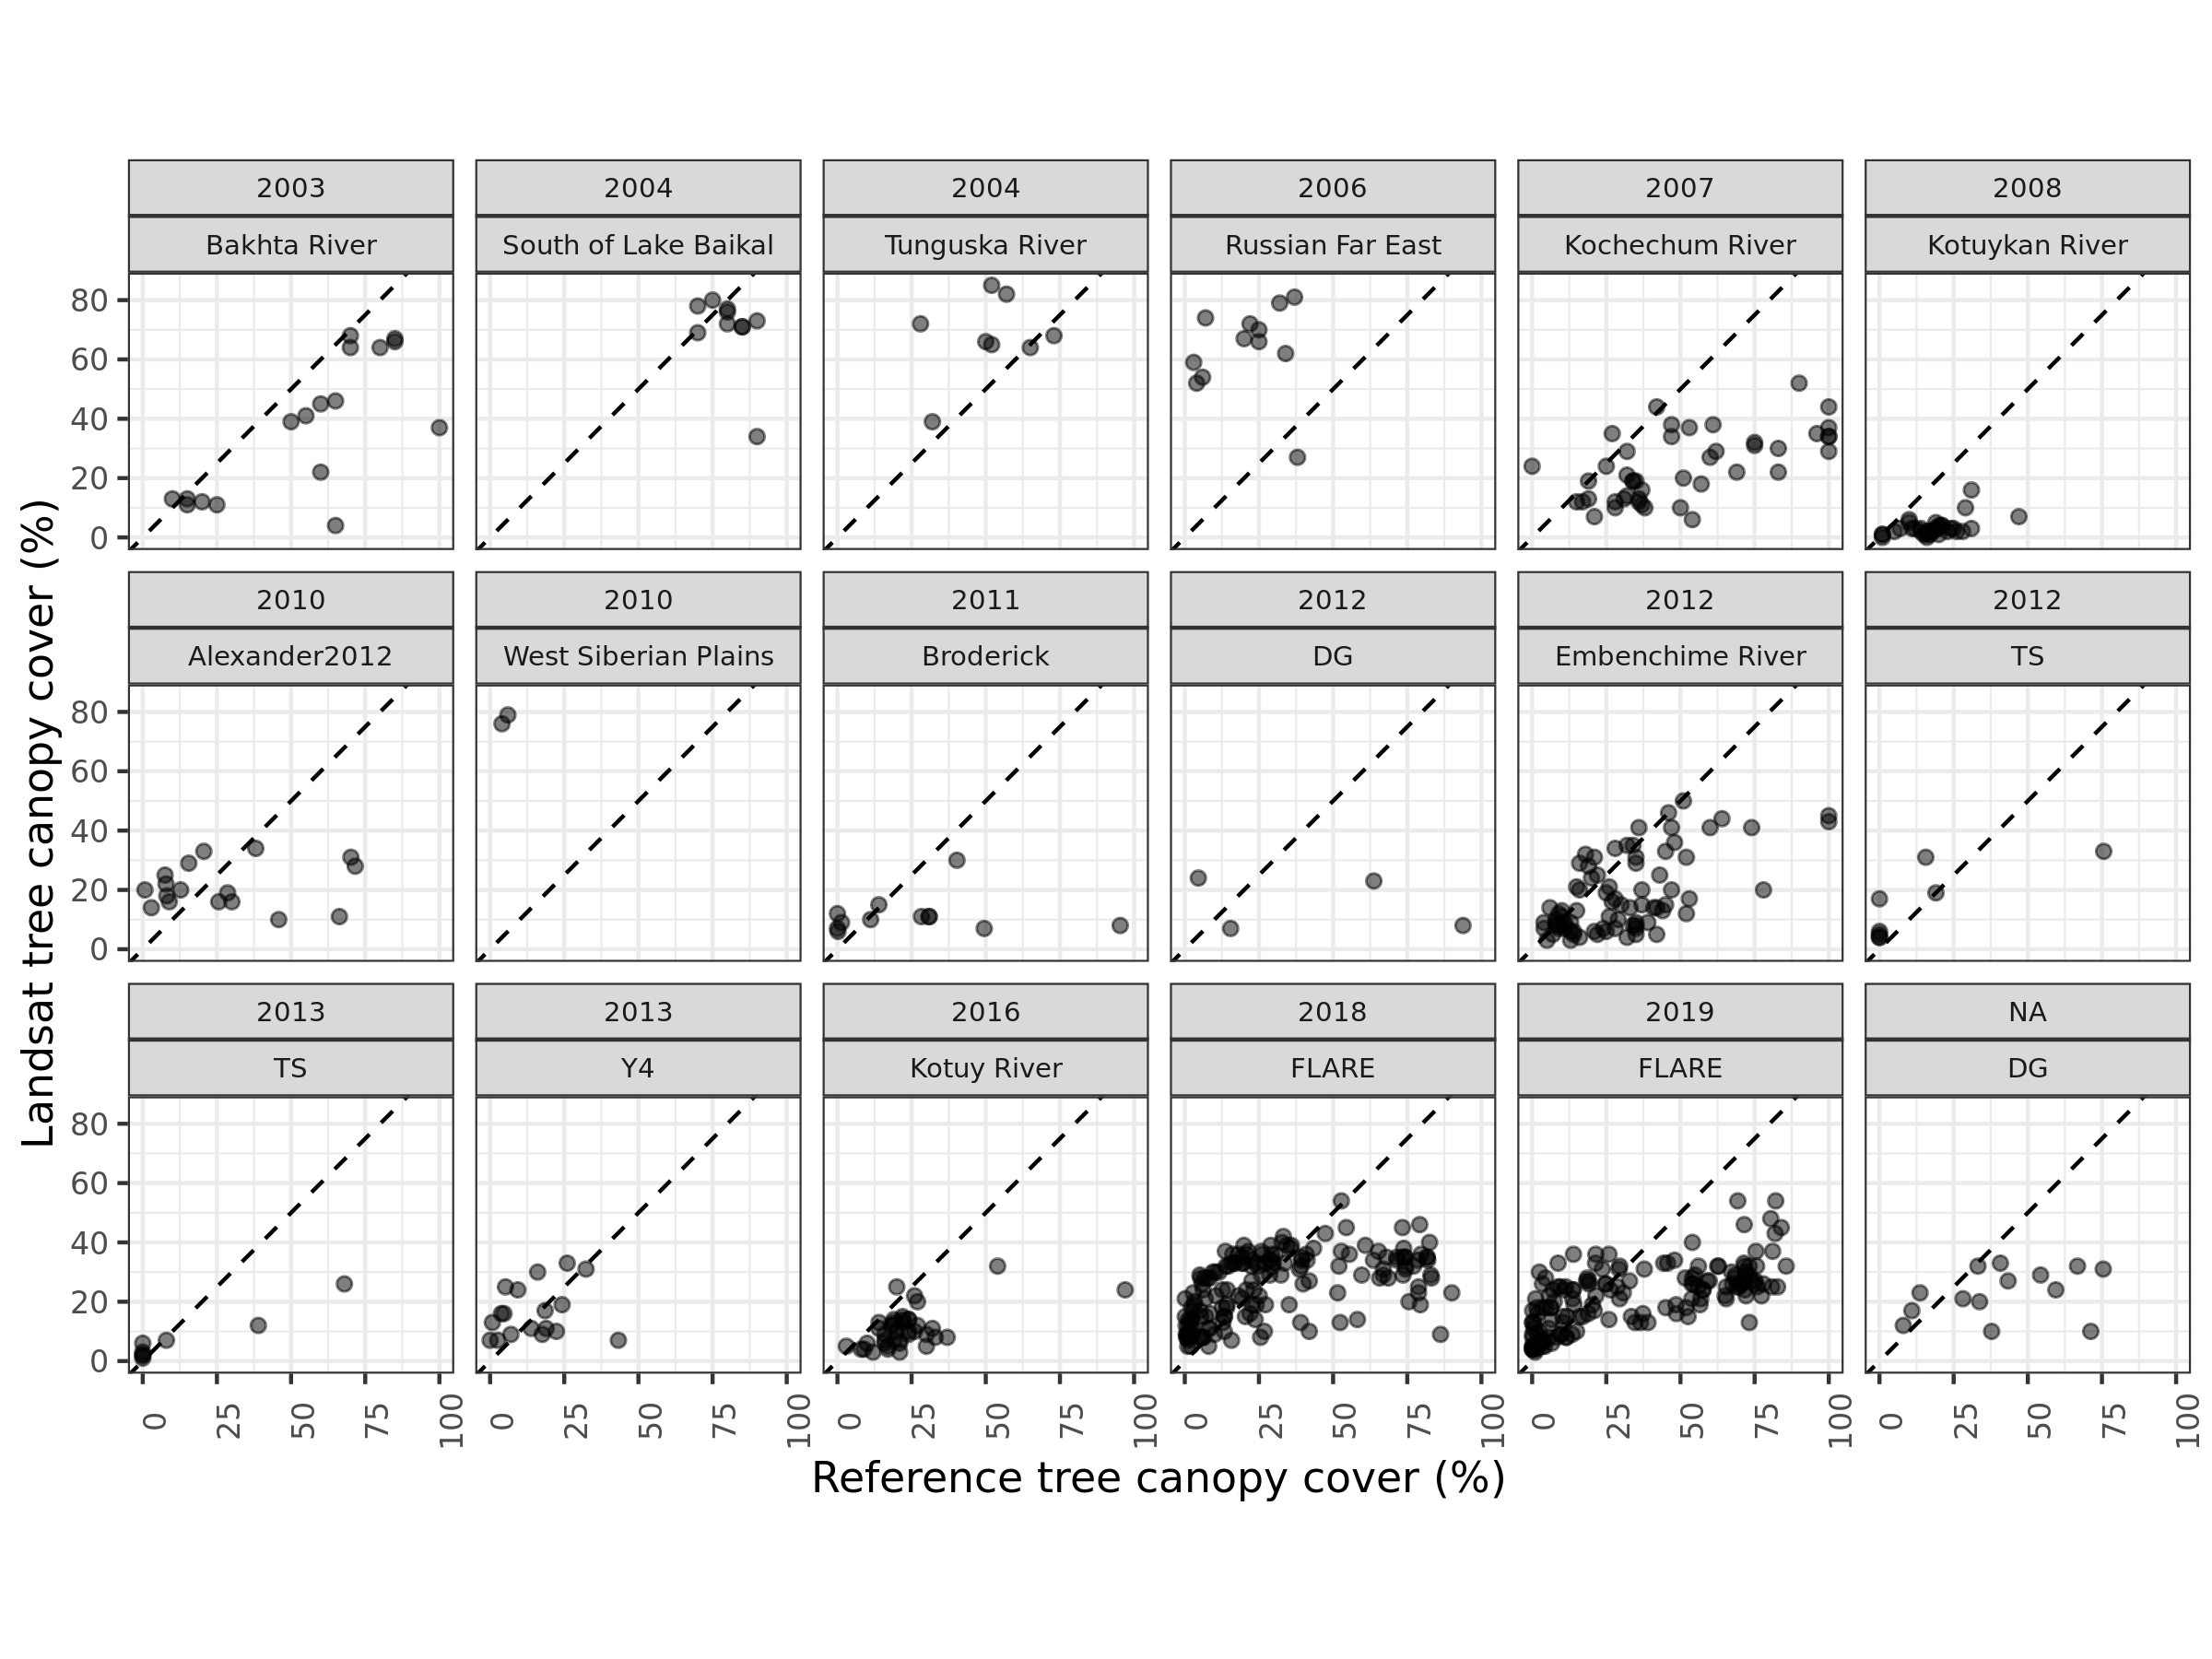

In [9]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)

plots_tcc %>% #drop_na(names(eurasia_tcc)[grep("tp_tcc2", names(eurasia_tcc))]) %>% 
    as.data.frame() %>% 
    drop_na(canopy_cover) %>%
    droplevels() %>%
    ggplot(aes(x=as.numeric(canopy_cover), y=value_tcc2004)) + 
    geom_point( alpha=0.5) + 
    geom_abline(linetype='dashed') +
    coord_equal() +
    theme_bw() +
    theme(axis.text.x=element_text(angle=90, size=8), axis.text.y = element_text(size=8), strip.text = element_text(size=7)) + 
    labs(x='Reference tree canopy cover (%)', y = 'Landsat tree canopy cover (%)') +
    facet_wrap(year~group_name, ncol=6)

### Plot all Landsat years' data against reference estimate

In [11]:
plots_tcc.m = reshape2::melt(plots_tcc, id.vars=c('site', 'year','group_name','canopy_cover')) 
plots_tcc.m$variable <- gsub("value_tcc", "", plots_tcc.m$variable)

Warning message:
“Removed 12205 rows containing missing values (`geom_point()`).”


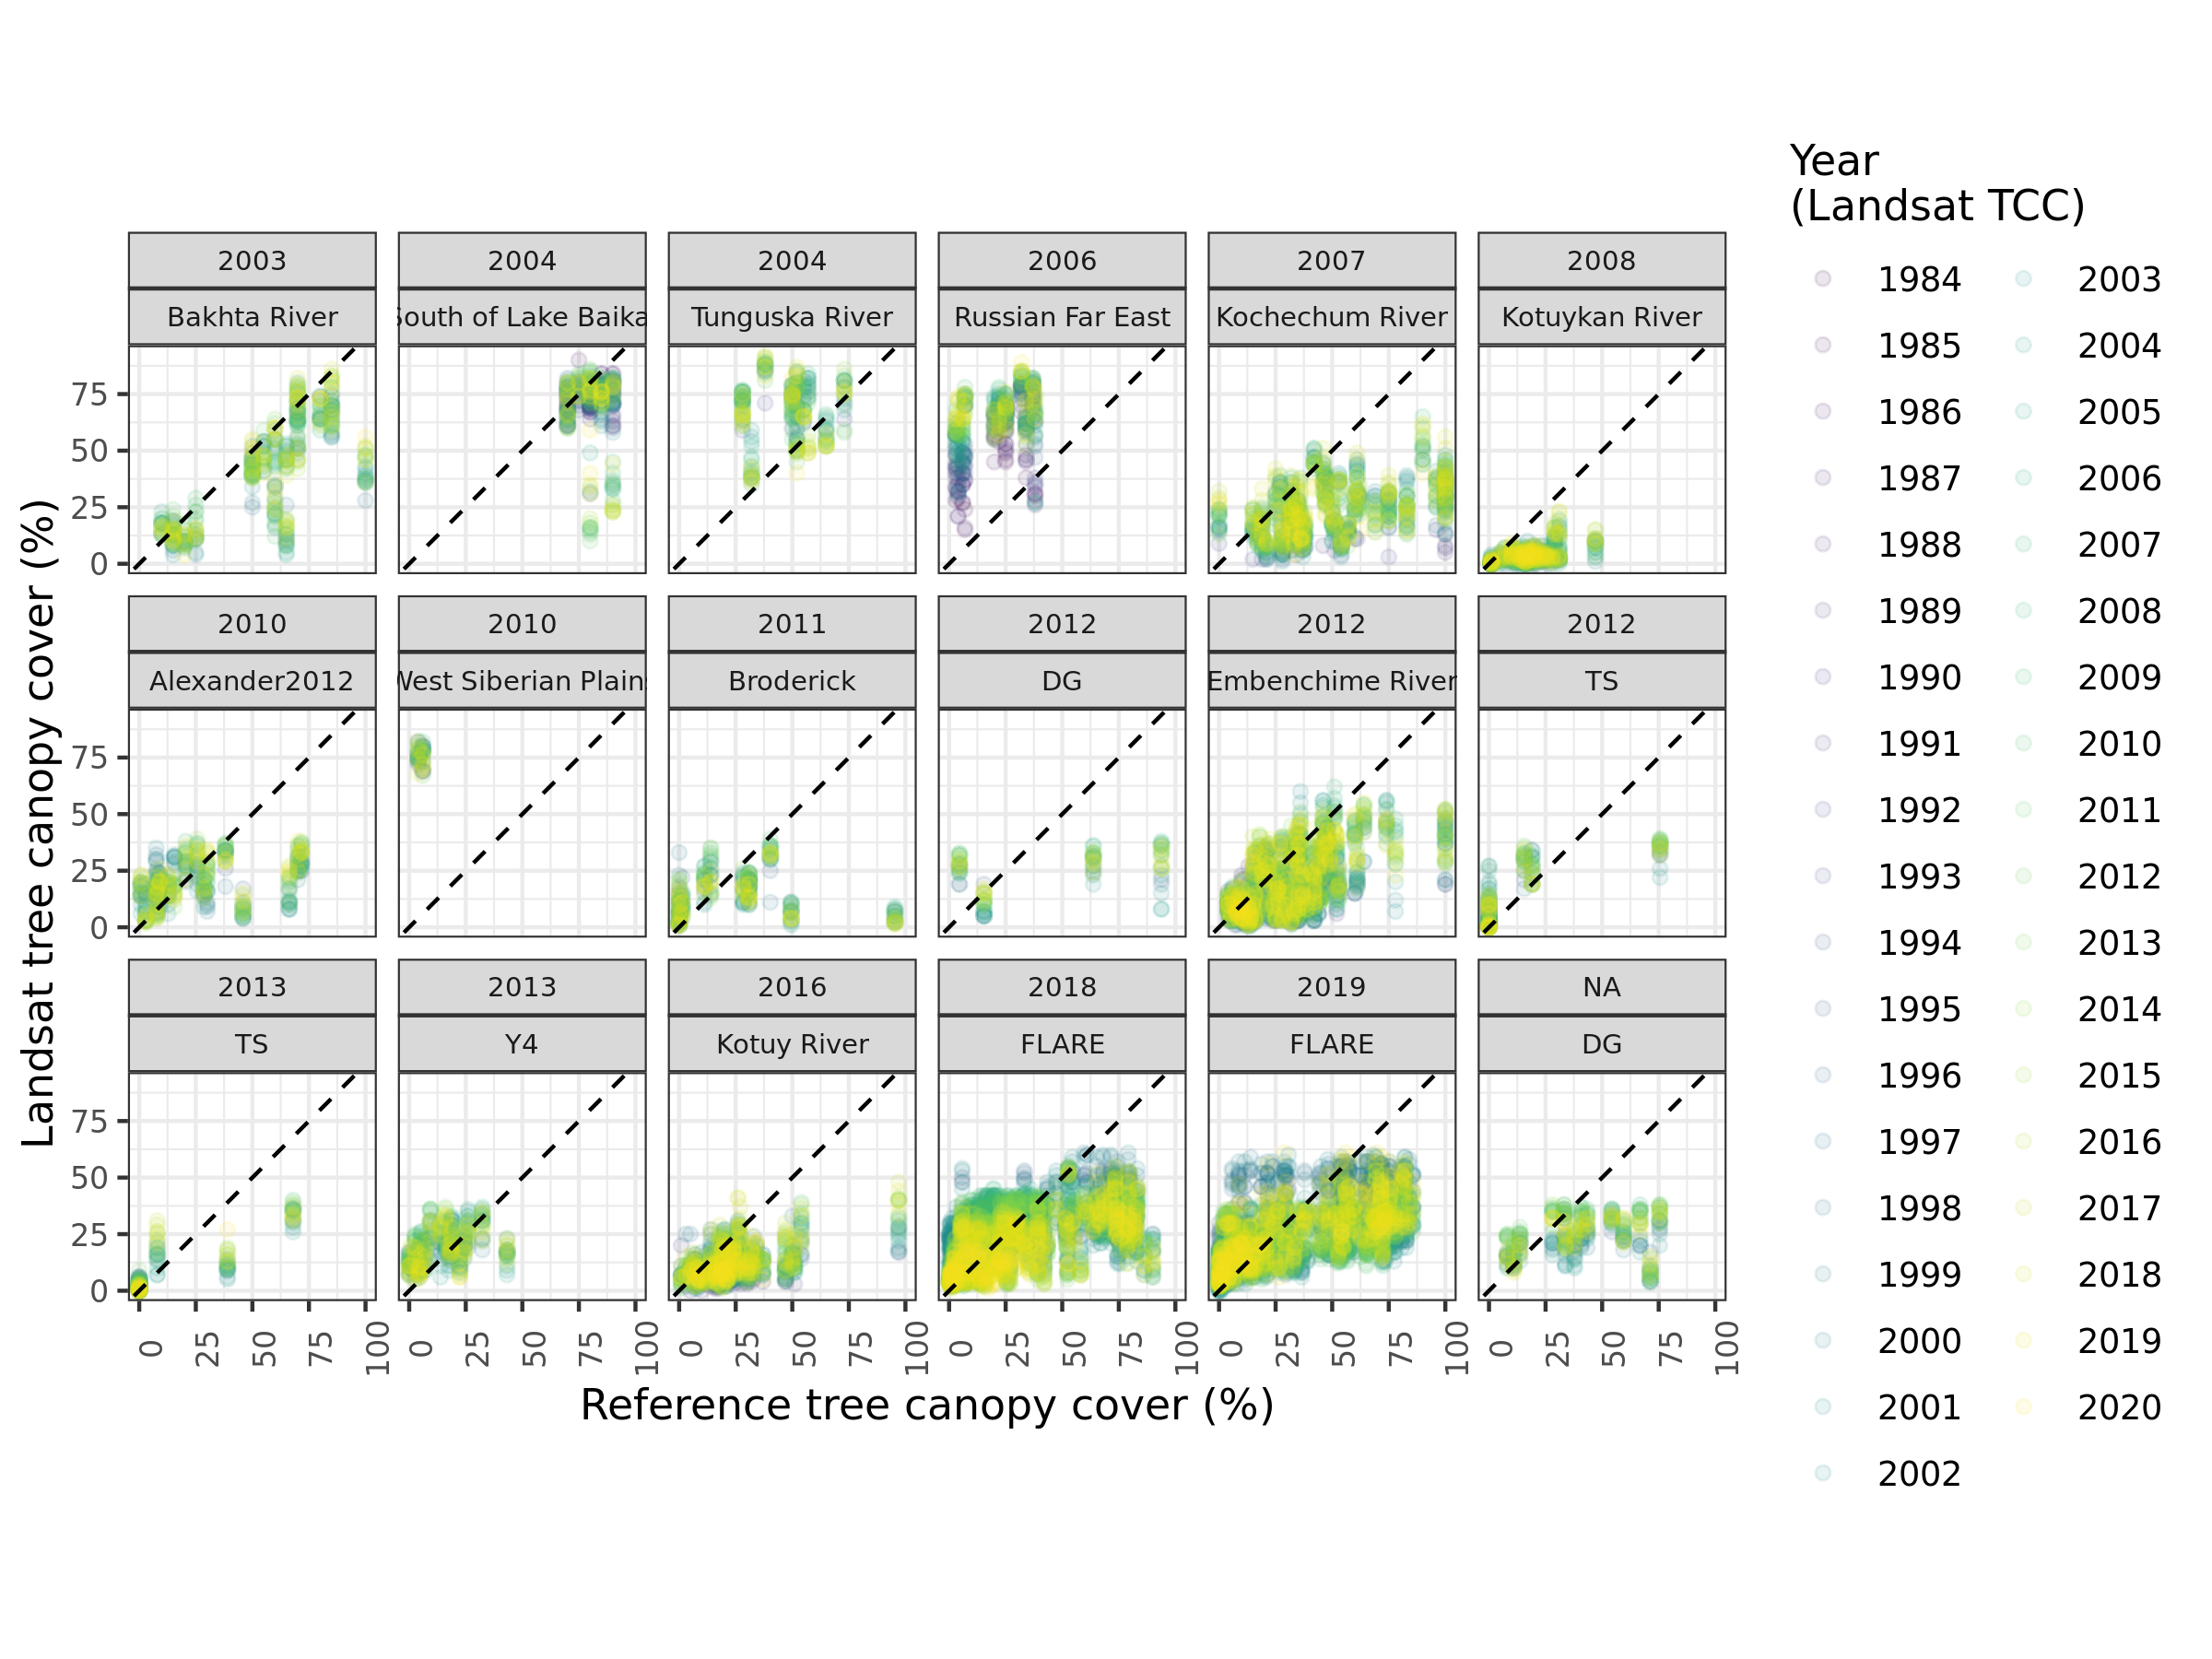

In [44]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)


plots_tcc.m %>% #drop_na(names(eurasia_tcc)[grep("tp_tcc2", names(eurasia_tcc))]) %>% 
    as.data.frame() %>% 
    drop_na(canopy_cover) %>%
    droplevels() %>%
    ggplot(aes(x=as.numeric(canopy_cover), y=value, group=factor(canopy_cover))) + 
    #geom_pointrange(aes(ymin=min(value), ymax=max(value)), size=0.1) +
    geom_point(aes(color=factor(variable)),  alpha=.1) +
    scale_color_viridis_d(name='Year\n(Landsat TCC)') +
    geom_abline(linetype='dashed') +
    coord_equal() +
    theme_bw() +
    theme(axis.text.x=element_text(angle=90, size=8), axis.text.y = element_text(size=8), strip.text = element_text(size=7)) + 
    labs(x='Reference tree canopy cover (%)', y = 'Landsat tree canopy cover (%)') +
    facet_wrap(year~group_name, ncol=6)

## Timeline of Boreal TCC with field-derived reference measurements

In [59]:
smry

group_name,n
<chr>,<int>
Alexander2012,17
Amur River,22
Bakhta River,27
Broderick,12
Changbai Mountains,64
DG,21
Embenchime River,88
FLARE,321
Kochechum River,47


`summarise()` has grouped output by 'group_name'. You can override using the
`.groups` argument.
Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”
Warning message:
“Removed 17 rows containing missing values (`stat_boxplot()`).”
Warning message:
“Removed 287 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 13608 rows containing missing values (`geom_path()`).”


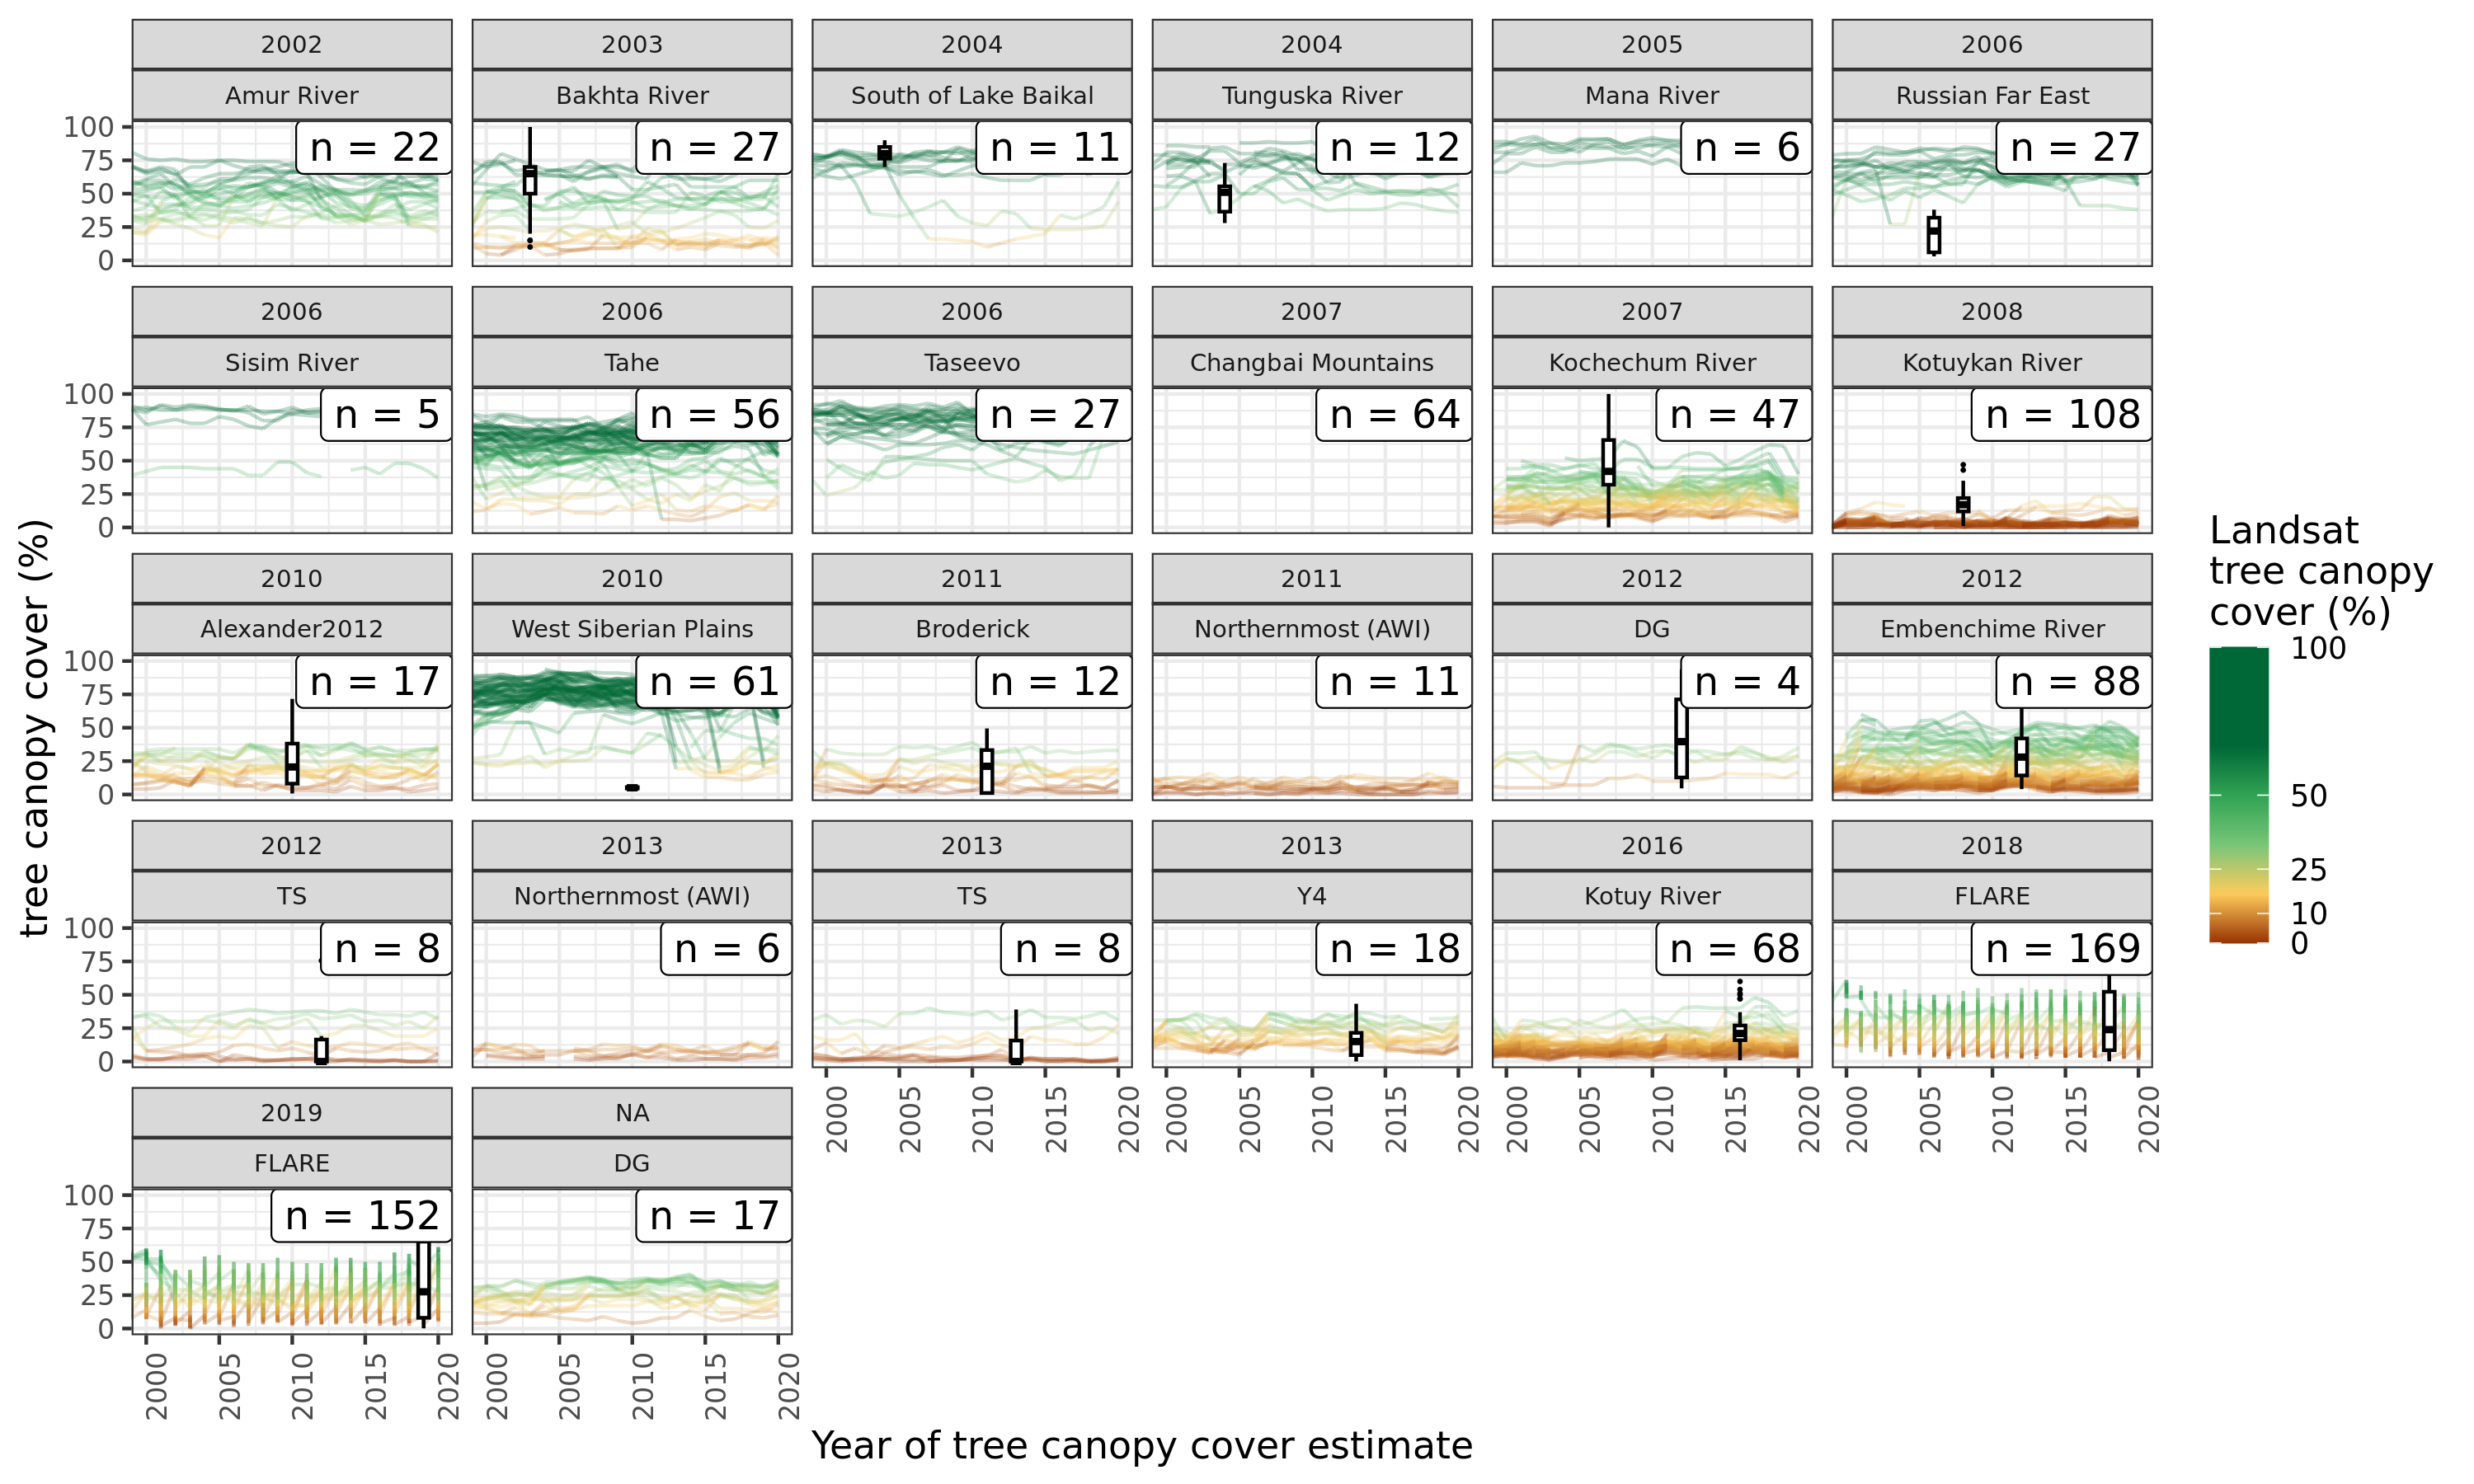

In [60]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 300)

smry = plots_tcc %>% 
dplyr::group_by(group_name, year) %>% dplyr::summarize(n=n())

TCC_pal <- colorRampPalette(c('#993404','#fecc5c','#78c679','#31a354','#006837','#006837','#006837')) 
ggplot() + 
    geom_path(data=plots_tcc.m, aes(x=as.numeric(variable), y=value, group=site, color=as.numeric(value)), alpha=0.25, show.legend=TRUE) + 
    geom_boxplot(data=plots_tcc, aes(x=as.numeric(year), y=as.numeric(canopy_cover)), color='black', show.legend=FALSE, outlier.size=0.1, lwd=0.5) +
    geom_label(data=smry, aes(x=Inf, y=Inf, label=paste('n =', n)), hjust='inward', vjust='inward', size=4) +
        #scale_color_viridis_d(option='inferno') + 
        #scale_color_distiller(palette='Greens', direction=1) + 
        scale_color_gradientn(colors=TCC_pal(50), limits=c(0,100), breaks=c(0,10,25,50,100), name='Landsat\ntree canopy\ncover (%)') +
        theme_bw() + 
        coord_cartesian(xlim=c(2000,2020)) +
        theme(axis.text.x=element_text(angle=90, size=8), axis.text.y = element_text(size=8), strip.text = element_text(size=7)) + 
        facet_wrap(year~group_name)+
        labs(x='Year of tree canopy cover estimate', y = 'tree canopy cover (%)')

In [42]:
plots_tcc %>% filter(group_name == 'West Siberian Plains') %>% drop_na('canopy_cover')

site,canopy_cover,year,group_name,value_tcc1984,value_tcc1985,value_tcc1986,value_tcc1987,value_tcc1988,value_tcc1989,⋯,value_tcc2011,value_tcc2012,value_tcc2013,value_tcc2014,value_tcc2015,value_tcc2016,value_tcc2017,value_tcc2018,value_tcc2019,value_tcc2020
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
136971466_23,4,2010,West Siberian Plains,NA,NA,NA,NA,NA,74,⋯,74,75,78,79,74,75,82,80,78,68
547690172_26,6,2010,West Siberian Plains,NA,NA,NA,NA,NA,69,⋯,67,69,76,78,70,72,76,77,72,70


Warning message:
“Removed 17 rows containing missing values (`stat_boxplot()`).”Warning message:
“Removed 287 rows containing non-finite values (`stat_boxplot()`).”Warning message:
“Removed 304 rows containing missing values (`geom_point()`).”

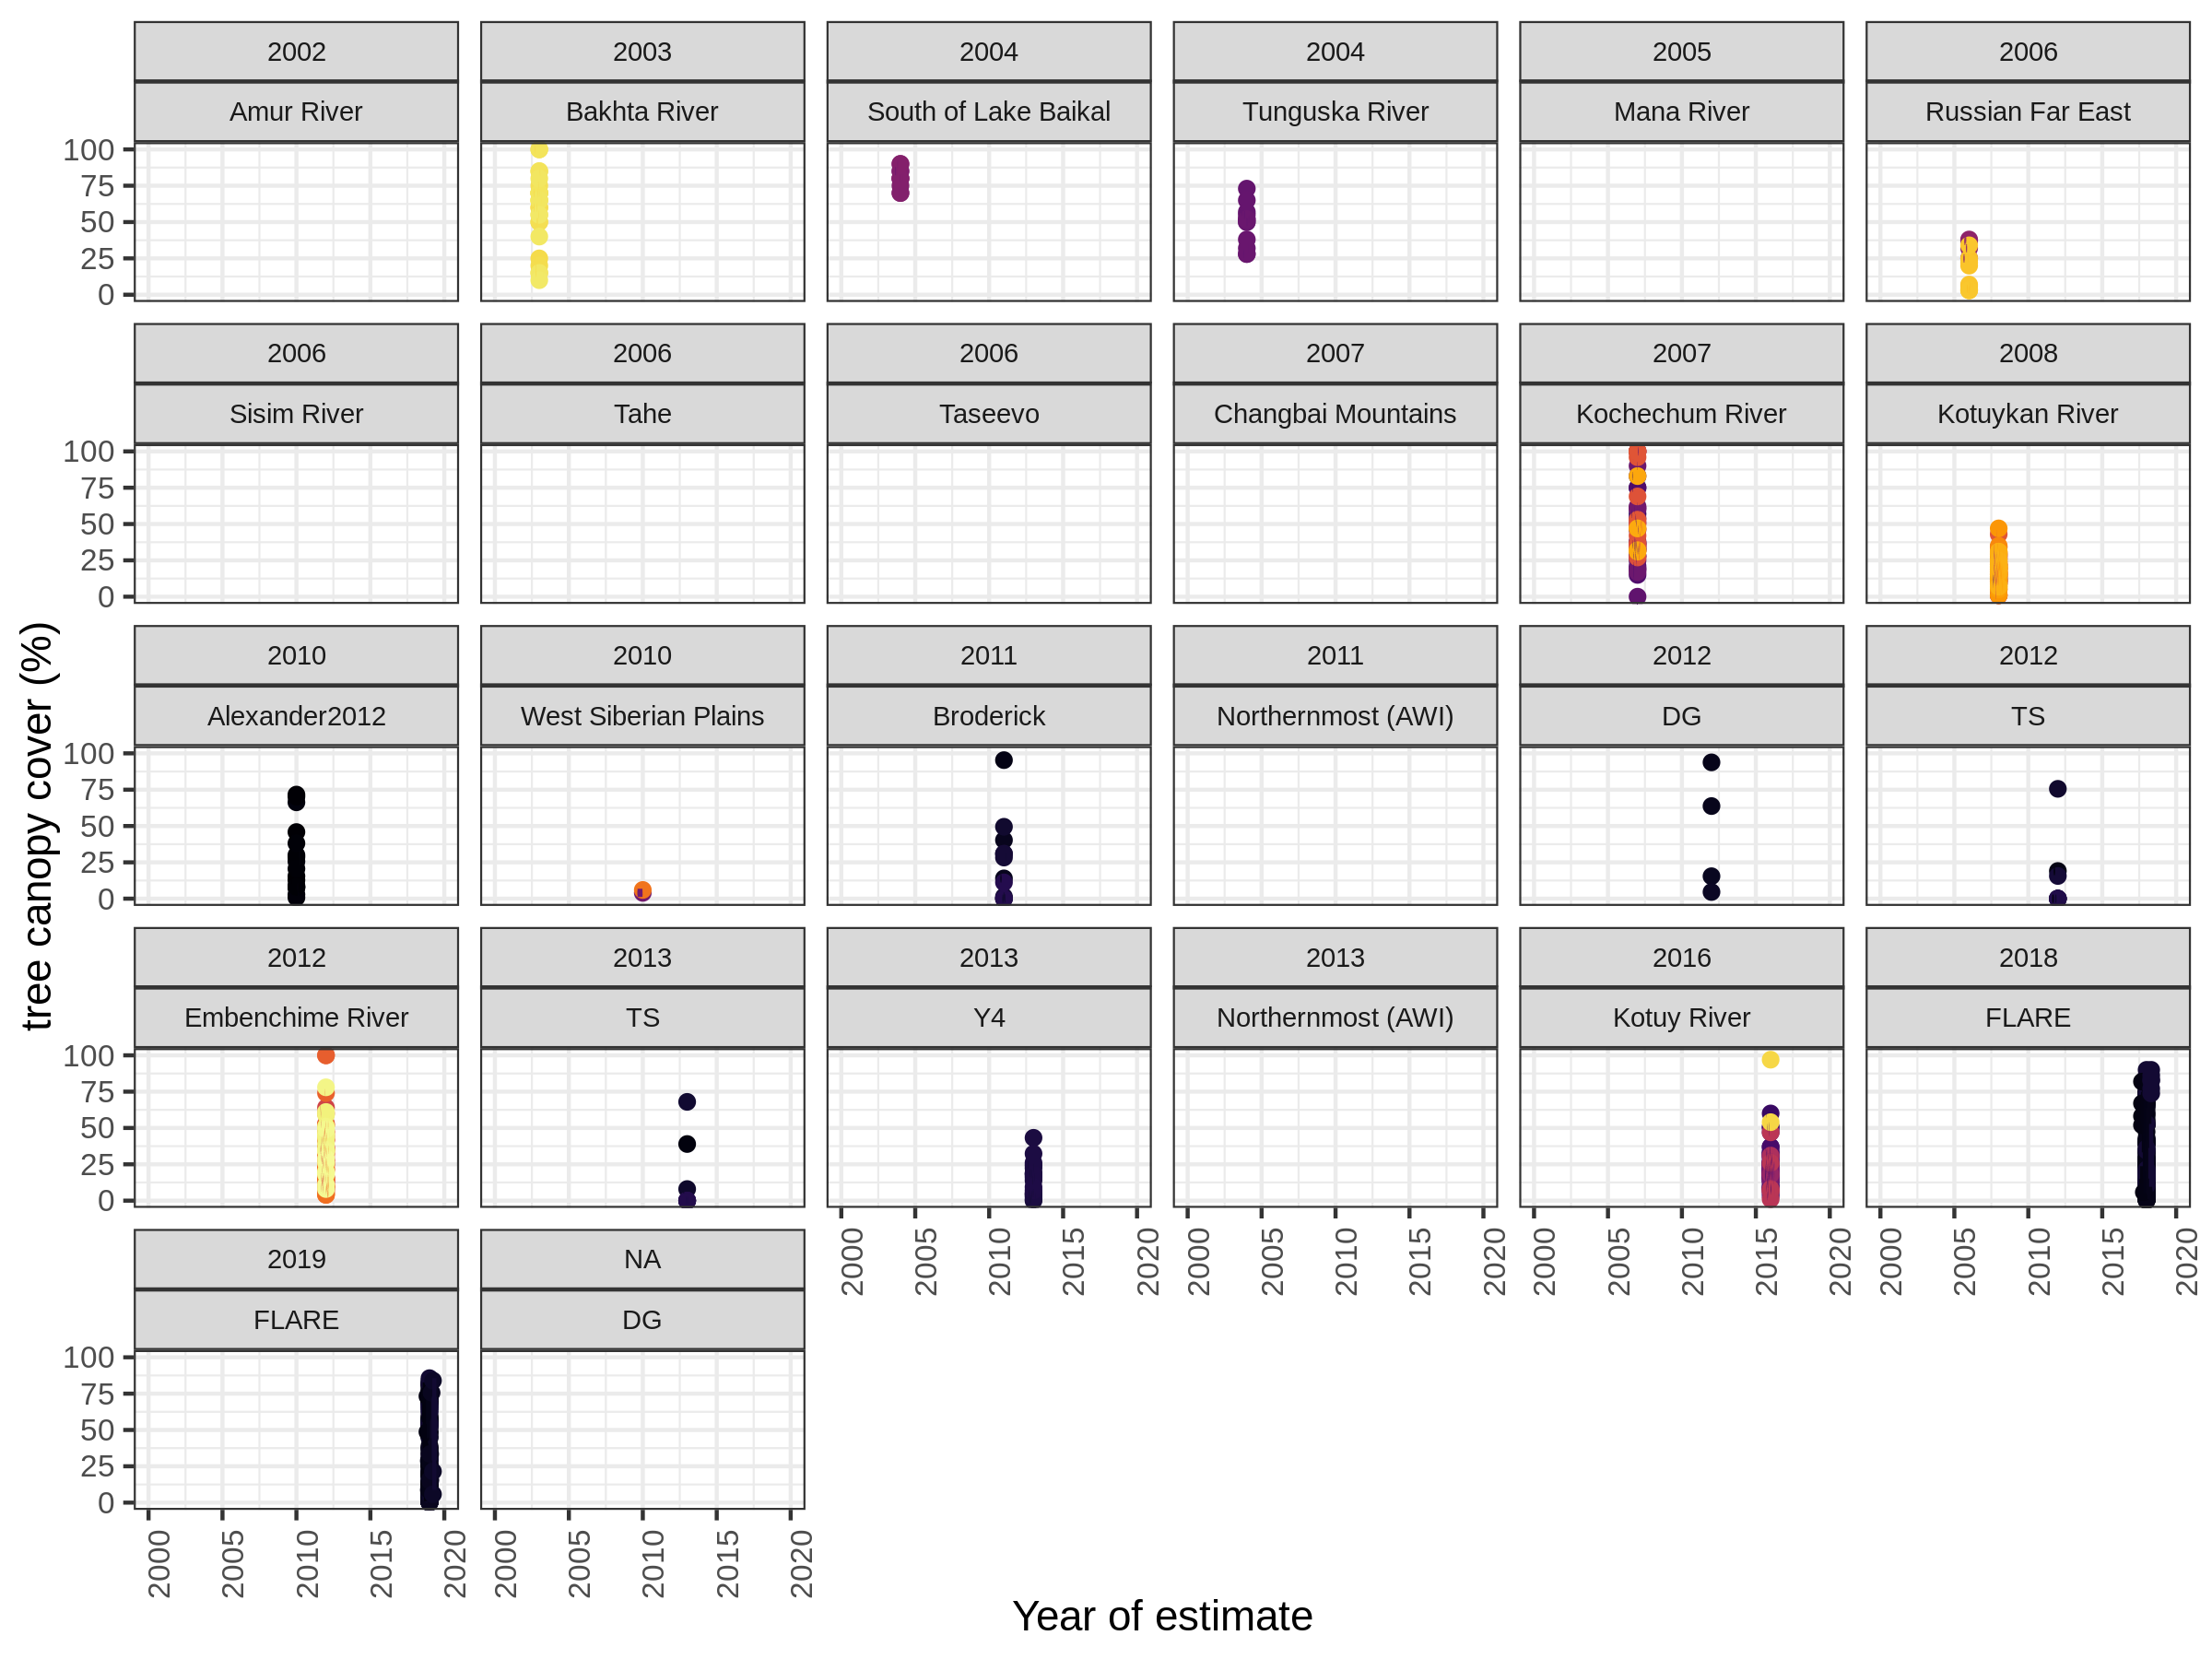

In [55]:
plots_tcc.m %>% 
    #filter(site == 4) %>%
    ggplot(aes(x=as.numeric(variable), y=value, group=site, color=site)) + 
        #scale_y_continuous(limits=c(0,50))+
        geom_path(alpha=0.25, show.legend=FALSE) + 
        geom_point(data=plots_tcc, aes(x=as.numeric(year), y=as.numeric(canopy_cover, group=group_name, color=site)), show.legend=FALSE) +
        geom_boxplot(data=plots_tcc, aes(x=as.numeric(year), y=as.numeric(canopy_cover)), show.legend=FALSE) +
        scale_color_viridis_d(option='inferno') + 
        theme_bw() + 
        coord_cartesian(xlim=c(2000,2020)) +
        theme(axis.text.x=element_text(angle=90, size=8), axis.text.y = element_text(size=8), strip.text = element_text(size=7)) + 
        facet_wrap(year~group_name)+
        labs(x='Year of estimate', y = 'tree canopy cover (%)')